In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them

In [13]:
mens_rowing = pd.read_csv('../data/mens-rowing.csv')
mens_gymnastics = pd.read_csv('../data/mens_gymnastics.csv')

In [14]:
mens_rowing.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
2,14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze
3,15215,8214,Jacob Jepsen Barse,M,27.0,188.0,73.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Silver
4,18441,9764,Alexander Belonogoff,M,26.0,187.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Silver


In [15]:
mens_gymnastics.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
1,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
2,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
3,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
4,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze


# Comparing the distribution of "Weight" in mens_rowing and mens_gymnastics

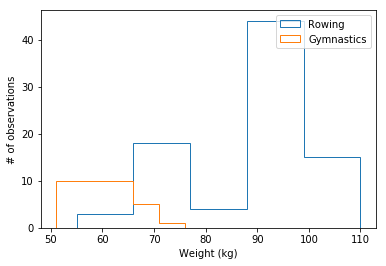

In [16]:
fig, ax = plt.subplots()
ax.hist(mens_rowing.Weight, histtype='step', bins=5, label='Rowing')
ax.hist(mens_gymnastics.Weight, histtype='step', bins=5, label='Gymnastics')
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('# of observations')
ax.legend()
plt.show()

Selecting groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

# Adding error bars

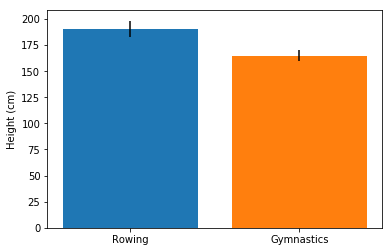

In [17]:
fig, ax = plt.subplots()
ax.bar('Rowing', mens_rowing.Height.mean(), yerr=mens_rowing.Height.std())
ax.bar('Gymnastics', mens_gymnastics.Height.mean(), yerr=mens_gymnastics.Height.std())
ax.set_ylabel("Height (cm)")

plt.show()

# Boxplot

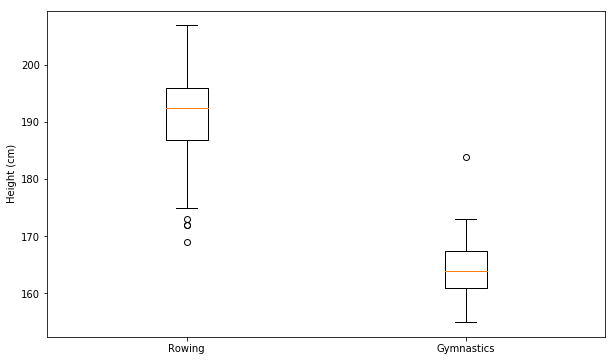

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([mens_rowing.Height, mens_gymnastics.Height])
ax.set_xticklabels(['Rowing', 'Gymnastics'])
ax.set_ylabel('Height (cm)')
plt.show()

we can see how many individuals are outliers within their group. 

In [19]:
summer_2016_medals = pd.read_csv('../data/summer_2016_medals.csv')
summer_2016_medals.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [20]:
sports = summer_2016_medals.Sport.unique()
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics'],
      dtype=object)

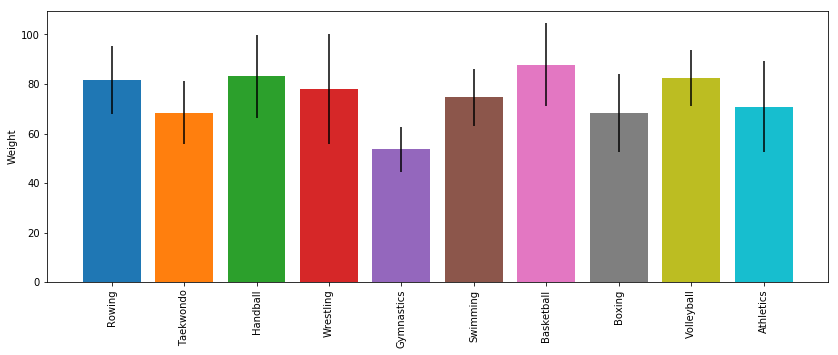

In [23]:
fig, ax = plt.subplots(figsize=(14,5))

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport']==sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport,sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig('../data/sports_weights.png')
plt.show()